No notebook anterior, nós aprendemos intuitivamente como o perceptron aprende. De maneira geral, nós vamos atualizando os pesos e o bias sempre buscando diminuir uma função de custo. Nesse notebook, nós vamos ver como esse aprendizado realmente acontence, tanto na teoria quanto na prática. Também utilizaremos o Perceptron para resolver problemas de classificação e regressão.

__Objetivos__:

- Implementar o perceptron e seu modelo de aprendizado em Python puro e Numpy
- Utilizar o perceptron para regressão e classificação

# Sumário

[Introdução](#Introdução)
- [Regra de Aprendizado do Perceptron](#Regra-de-Aprendizado-do-Perceptron)
- [Pseudo-algoritmo do Perceptron](#Pseudo-algoritmo-do-Perceptron)

[Classificação](#Classificação)
- [Porta AND/OR](#Porta-AND/OR)
- [Exercício de Classificação](#Exerc%C3%ADcio-de-Classificação)

[Regressão](#Regressão)
- [Exercício de Regressão](#Exerc%C3%ADcio-de-Regressão)

[Referências](#Referências)

# Imports e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

# Introdução

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o __Perceptron__. Inicialmente, o Perceptron foi projetado para ser um __classificador binário linear__ responsável por mapear uma ou mais entradas em uma saída desejada. Porém, também podemos utilizá-lo para resolver problemas de __regressão linear__. Ele foi projetado em 1957 por Frank Rosenblatt.

O perceptron é formado por:

<img src='images/perceptron.png' width='350'>

- __entradas__ $x_1,...,x_D$: representam os atributos dos seus dados com dimensionalidade $D$. O Perceptron aceita qualquer tamanho de entrada, porém a saída é sempre apenas um valor.
- __junção aditiva__ $\sum$: também chamada de _função agregadora_, nada mais é que a soma ponderada das entradas com os __pesos__ ($w_1,...,w_D)$. Em geral, o resultado é somado com um __bias__ $b$, responsável por deslocar o resultado do somatório. A junção aditiva é descrita pela seguinte fórmula:

$$\sum_i^D{x_iw_i} + b$$

- __função de ativação__ $f$: utilizada para mapear o resultado da junção aditiva em uma saída esperada. Mais detalhes abaixo.

Logo, o Perceptron é representado pela seguinte fórmula matemática:

$$\widehat{y}_i = f(\sum_i^D{x_iw_i} + b)$$

Onde:

- $D$: representa a dimensionalidade das amostras, ou seja, a quantidade de atributos de cada amostra.
- $x_i$: representam os atributos de uma amostra que servem de entrada para o Perceptron.
- $w_i$: representam os __pesos sinápticos__ que ponderam as entradas.
- $b$: representa o __bias__, responsável por deslocar a fronteira de decisão além da origem e não depende de nenhum valor de entrada. Repare que o bias encontra-se fora do somatório.
- $f$: __função de ativação__. Quando a função de ativação é linear, ou seja, nenhuma transformação é aplicada no resultado da junção aditiva, o Perceptron atua como um __Regressor Linear__. Se precisamos efetuar uma __Classificação binária__, devemos utilizar a função _step_ (também conhecida como _função degrau_) para mapear a saída em um valor discreto (0 ou 1):

$$f = \begin{cases}1 & se \ wx+b > 0\\0 & caso \ contr\acute ario\end{cases}$$

- $\widehat{y}$: representa a saída do Perceptron (o valor predito).

__Observações importantes__:

- O Perceptron não faz __Classificação Multiclasse__.
- __A atualização dos pesos é *online*, ou seja, efetuada amostra a amostra__ utilizando uma fórmula pré-definida que veremos na seção a seguir.

## Regra de Aprendizado do Perceptron

O Perceptron tem sua própria forma de aprendizado conforme definido no seu artigo original. Na verdade, a fórmula para atualização dos pesos e bias é bem simples:

$$w_i = w_i + \lambda(y_i - \widehat{y}_i)x_i$$
<br>
$$b_i = b_i + \lambda(y_i - \widehat{y}_i)$$

Onde $\lambda$ é a __taxa de aprendizagem__ (___learning rate___).

Repare que $y_i - \widehat{y}_i$ significa calcular a diferença entre o valor esperado ($y_i$) e o valor predito ($\widehat{y}_i$). Supondo que estamos fazendo __classificação binária__ de uma amostra $(x_i, y_i)$. Nesse caso, teremos duas possibilidades:
- __O valor esperado é $y_i = \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __igual__ a saída esperada. Nesse caso, __a diferença $y_i - \widehat{y}_i = 0$ e não haverá atualização de pesos__.
- __O valor esperado é $y_i \neq \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __diferente__ da saída esperada. Nesse caso, __a atualização dos pesos será dada pela diferença $y_i - \widehat{y}_i$__. Repare que:
    - quando essa diferença é __negativa__ (ou seja, $y_i = 0$ e $\widehat{y}_i = 1$), __os pesos tendem a diminuir__.
    - quando essa diferença é __positiva__ (ou seja, $y_i = 1$ e $\widehat{y}_i = 0$), __os pesos tendem a aumentar__.

## Pseudo-algoritmo do Perceptron

1. Inicialize os pesos $w$ e o bias $b$
2. Para cada amostra $(x_n, y_n)$ do nosso banco:
    1. Calcule $\widehat{y} = f(\sum_i^D{x_iw_i} + b)$, onde $f$ é a __função _step_ para classificação__ e __linear no caso da regressão__
    2. Calcule o $erro = y_n - \widehat{y}$
    3. Atualize os pesos $w_i = w_i + \lambda*erro*x_i$
    4. Atualize o bias $b_i = b_i + \lambda*erro$
3. Repita o passo 2 por N vezes ou até que alguma medida de custo para o $erro$ seja menor que um valor pré-determinado.
    
Repare, como dito lá em cima, que __a atualização dos pesos e bias é feito a cada amostra__, e não somente após ver todas as amostras do banco.

# Classificação

## Porta AND/OR

In [2]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 1]) # porta OR
y = np.array([0, 0, 0, 1]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4,)


### Python

In [3]:
D = x.shape[1]
w = [2*random() - 1 for _ in range(D)] # -1 a 1
b = 2 * random() - 1 # -1 a 1

learning_rate = 1e-2

f = lambda x: 1 if x > 0 else 0

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i * w_i for x_i, w_i in zip(x_n, w)]) + b
        y_pred = f(y_pred)
        erro = y_n - y_pred
        w = [w_i + learning_rate * erro * x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate * erro
        cost += erro**2

    if step % 10 == 0:
        print('Step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format([f(i) for i in np.dot(x, np.array(w)) + b]))


Step 0: 1
Step 10: 2
Step 20: 2
Step 30: 2
Step 40: 2
Step 50: 2
Step 60: 2
Step 70: 2
Step 80: 2
Step 90: 2
Step 100: 0
w:  [0.8565009403940558, 0.016825604688534508]
b:  -0.8638561506076452
y_pred: [0, 0, 0, 1]


### Numpy

In [4]:
D = x.shape[1]
w = 2 * np.random.random(size=D) - 1
b = 2 * np.random.random() - 1

learning_rate = 1e-2

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b
        y_pred = np.where(y_pred > 0, 1, 0)
        erro = y_n - y_pred
        w = w + learning_rate * np.dot(erro, x_n)
        b = b + learning_rate * erro
        cost += erro**2

    if step % 10 == 0:
        print('Step: {0} cost: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format([f(i) for i in np.dot(x, np.array(w)) + b]))

Step: 0 cost: 2
Step: 10 cost: 2
Step: 20 cost: 2
Step: 30 cost: 2
Step: 40 cost: 2
Step: 50 cost: 2
Step: 60 cost: 2
Step: 70 cost: 0
Step: 80 cost: 0
Step: 90 cost: 0
Step: 100 cost: 0
w:  [0.00541738 0.21958898]
b:  -0.22080621326528171
y_pred: [0, 0, 0, 1]


## Exercício de Classificação

(100, 2) (100,)


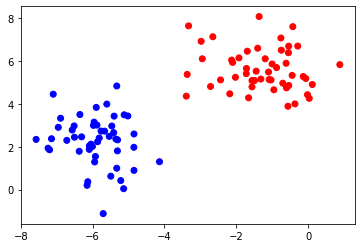

In [5]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

In [6]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

### Python

Step 0 erro: 8
Step 10 erro: 0
Step 20 erro: 0
Step 30 erro: 0
Step 40 erro: 0
Step 50 erro: 0
Step 60 erro: 0
Step 70 erro: 0
Step 80 erro: 0
Step 90 erro: 0
Step 100 erro: 0

w: [1.140752733632291, 1.0470921092311796]
b: 0.7035893097244085
y_pred: [ 5.14096295 -1.42666343 -4.80616155  7.59709435  5.52901068 -3.88986646
  4.83950863 -1.48700687  4.46620325  4.13110295 -2.11035559  2.48704532
 -4.96224901 -2.69008208 -4.03989096 -4.69525836  5.77075846  6.7611667
 -2.79761473  4.59718719 -5.53266744  4.93657881  5.31427687  4.48668725
 -2.9770812   4.59941859 -3.64422978  6.1713332   4.51473735  5.0922574
  2.89115648  3.93416064 -4.90918338 -3.87773771 -4.5540677   4.90115237
  5.72591405  3.29299275 -1.51341403 -2.90402415 -5.56200584 -4.33174192
 -3.97295793  5.69040106 -4.43396484  5.1698376   3.27524667  4.65867243
 -2.91978195  7.37999204  5.18460136 -4.15611023 -5.90869234 -2.65725226
 -3.67030094  7.08887667  6.06669868  8.17248307  4.98110872  6.00599112
  5.96495459 -0.313530

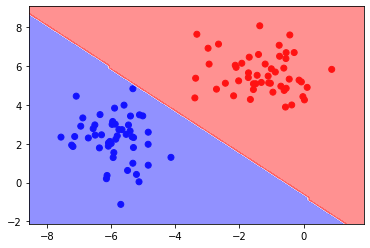

In [7]:
D = len(x)
w = [2 * random() - 1 for _ in range(D)]
b = 2 * random() -1 

learning_rating = 0.1 # 0.1

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i * w_i for x_i, w_i in zip(x_n, w)]) + b
        y_pred = 1 if y_pred > 0 else 0
        erro = y_n - y_pred
        w = [w_i + learning_rating * erro * x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rating * erro
        cost += erro**2

    if step % 10 == 0:
        print(f'Step {step} erro: {cost}')

print('')
print(f'w: {w}')
print(f'b: {b}')
print(f'y_pred: {np.dot(x, np.array(w)) + b}')

plot_linear_classifier(x, y, w, b)

### Numpy

Step 0 erro: 7
Step 10 erro: 0
Step 20 erro: 0
Step 30 erro: 0
Step 40 erro: 0
Step 50 erro: 0
Step 60 erro: 0
Step 70 erro: 0
Step 80 erro: 0
Step 90 erro: 0
Step 100 erro: 0

w: [0.3561004  0.16565074]
b: 0.5489555218672499
y_pred: [ 0.78466863 -0.66965251 -1.23884053  1.39939295  1.01443107 -1.02927836
  1.01209436 -0.69719369  1.0792251   0.99199535 -0.74776768  0.23938222
 -1.60207591 -0.93883466 -1.25615391 -1.42432153  1.27190031  1.41043514
 -1.05130803  0.79044818 -1.70895814  0.8799403   1.27470406  0.97935208
 -1.08294229  0.93378554 -1.16836742  1.30564942  0.7821556   1.11878206
  0.51151953  0.78505542 -1.3039241  -1.32927155 -1.46268297  0.62803203
  1.13301763  0.66705988 -0.78599812 -1.01690861 -1.70637428 -1.18351322
 -1.25255815  1.16120596 -1.30387306  1.16017138  0.52708015  0.87265845
 -0.95615177  1.55371281  1.06364718 -1.36211146 -1.57434869 -0.70967623
 -1.35314003  1.46347418  1.37262271  1.65513779  1.11926187  1.14075785
  1.40104002 -0.54771221  0.37775258

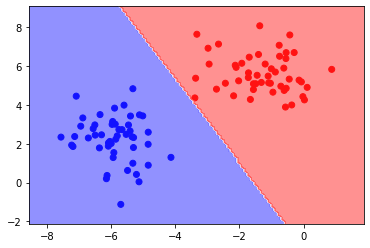

In [8]:
D = x.shape[1]
w = 2 * np.random.random(size=D) - 1
b = 2 * np.random.random() - 1

learning_rating = 1e-2

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b
        y_pred = np.where(y_pred > 0, 1, 0)
        erro = y_n - y_pred
        w = w + learning_rating * np.dot(erro, x_n)
        b = b + learning_rating * erro
        cost += erro

    if step % 10 == 0:
        print(f'Step {step} erro: {cost}')

print('')
print(f'w: {w}')
print(f'b: {b}')
print(f'y_pred: {np.dot(x, np.array(w)) + b}')

plot_linear_classifier(x, y, w, b)

# Regressão 

Para transformar o Perceptron em um __regressor linear__, só o que temos de fazer é __remover a função de ativação _step___, transformando-a em uma função de ativação linear.

Apesar dessa modificação, __a fórmula de atualização dos pesos não sofre nenhuma alteração__. 

Vamos, então, implementar nosso perceptron para classificação em Python, Numpy, Keras e TensorFlow:

In [29]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


Text(0, 0.5, 'Peso')

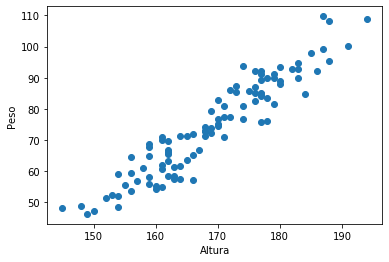

In [30]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [31]:
print(x.shape, y.shape)

(100,) (100,)


In [32]:
x = x.reshape(-1, 1)

print(x.shape, y.shape)

(100, 1) (100,)


### Python

__Exercício__: tentar estimar as learning_rates de **w** e __b__. Elas são diferentes por que nossos dados não estão na mesma escala!

In [33]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num regressor?
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        # y_pred = 1 if y_pred > 0 else 0
        error = y_n - y_pred
        w = [w_i + 1e-7*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + 1e-2*error
        cost += error**2

    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 1637157.508155411
step 1000: 9522.920851769357
step 2000: 3826.905569670848
step 3000: 2831.730728041759
step 4000: 2659.7954904671446
step 5000: 2630.9092988245843
step 6000: 2626.406500727518
step 7000: 2625.858670138015
step 8000: 2625.8650597509118
step 9000: 2625.9093511632273
step 10000: 2625.9352654363165
w:  [1.3696708268483986]
b:  -157.85991276226065


### Numpy 

In [34]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num regressor?
        y_pred = np.dot(x_n, w) + b 
        #y_pred = np.where(y_pred > 0, 1, 0)
        error = y_n - y_pred
        w = w + 1e-7*np.dot(error, x_n)
        b = b + 1e-2*error
        cost += error**2
    
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 49955.18935166342
step 1000: 4841.06418399443
step 2000: 3008.2990186750735
step 3000: 2690.038902972426
step 4000: 2635.87827309781
step 5000: 2627.1317553121603
step 6000: 2625.9235297633995
step 7000: 2625.8501031655296
step 8000: 2625.8956476824196
step 9000: 2625.9282069269407
step 10000: 2625.9442382412026
w:  [1.36980812]
b:  -157.8828467022423


### Numpy com Pré-processamento

In [15]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 0.9999999999999991


In [16]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [33.60164767]
b:  74.99636286981102


In [26]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 

learning_rate = 1e-3 # <- tente estimar a learning_rate

for step in range(1001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2
    
    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 638951.1436356206
step 100: 7085.146373147472
step 200: 1143.499858149538
step 300: 601.7113941837517
step 400: 497.1908491182533
step 500: 440.1001620671669
step 600: 394.7980903654968
step 700: 356.9076423495617
step 800: 325.0057746415814
step 900: 298.1021101379822
step 1000: 275.38754922416194
w:  [17.40213822 15.82014822 16.31538917]
b:  149.20640768908015


## Exercício de Regressão

In [35]:
df = pd.read_csv('data/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


Text(0, 0.5, 'Final')

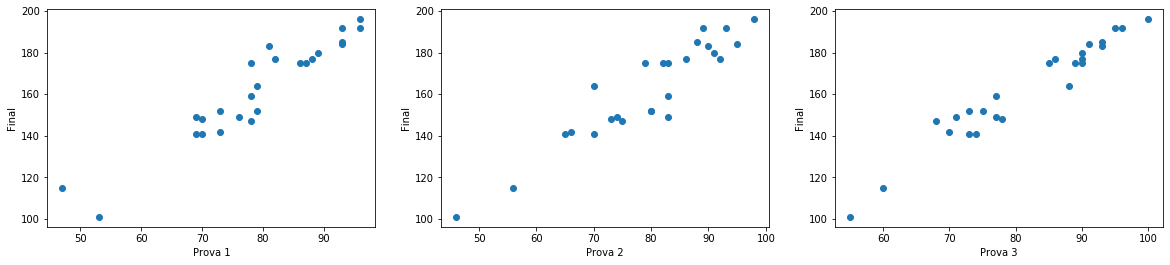

In [36]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.scatter(df.prova1.values, df.final.values)
plt.xlabel('Prova 1')
plt.ylabel('Final')

plt.subplot(1, 3, 2)
plt.scatter(df.prova2.values, df.final.values)
plt.xlabel('Prova 2')
plt.ylabel('Final')

plt.subplot(1, 3, 3)
plt.scatter(df.prova3.values, df.final.values)
plt.xlabel('Prova 3')
plt.ylabel('Final')

In [37]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values

print(x.shape, y.shape)

(25, 3) (25,)


In [38]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [39]:
reg = LinearRegression()
reg.fit(x, y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [ 8.72048636 14.1054877  26.26749487]
b:  150.65175754349872


### Python

In [47]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 1e-2 # 0.01

for step in range(2000): # <- tente estimar o número de passos
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 500679.70388935815
step 200: 173.8322754293723
step 400: 148.33917596188675
step 600: 146.39663248909667
step 800: 146.18060903857656
step 1000: 146.15420478221665
step 1200: 146.15102324044847
step 1400: 146.15068062927213
step 1600: 146.15065966119155
step 1800: 146.15066514515004
w:  [8.725195076500745, 14.139488702312024, 26.320511343723435]
b:  150.7111935382492


### Numpy

In [48]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1       

learning_rate = 1e-2 # <- tente estimar a learning_rate

for step in range(2000): # <- tente estimar o número de passos
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2
    
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 503189.3981026565
step 200: 172.38566786740694
step 400: 148.1462000729154
step 600: 146.37183221806285
step 800: 146.17746883099468
step 1000: 146.15381715428398
step 1200: 146.15097883283505
step 1400: 146.15067681465962
step 1600: 146.1506598424601
step 1800: 146.15066540799305
w:  [ 8.72517333 14.13950277 26.32051964]
b:  150.71119469135624


# Referências

- [Artigo original do Perceptron](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf)